In [14]:
#!/usr/bin/env python
__author__ = "Sreenivas Bhattiprolu"
__license__ = "Feel free to copy, I appreciate if you acknowledge Python for Microscopists"

# https://youtu.be/hraKTseOuJA

"""
Dataset from here: https://www.cs.ccu.edu.tw/~wtchu/projects/MoviePoster/index.html
"""

'\nDataset from here: https://www.cs.ccu.edu.tw/~wtchu/projects/MoviePoster/index.html\n'

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
!pip install -q kaggle

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.layers import BatchNormalization

In [18]:
# 1. Siapkan kredensial Kaggle (pastikan file kaggle.json sudah diunggah)
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# 2. Unduh dataset kamu dari Kaggle
!kaggle datasets download -d teguhchandra/dataset

# 3. Ekstrak isi dataset
!unzip dataset.zip -d ./movie_dataset_multilabel


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/teguhchandra/dataset
License(s): CC0-1.0
dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  dataset.zip
  inflating: ./movie_dataset_multilabel/DatasetMultilabel_Teguh Chandra Baskara_202255202117/DatasetMultilabel_Teguh Chandra Baskara_202255202117/1.jpg  
  inflating: ./movie_dataset_multilabel/DatasetMultilabel_Teguh Chandra Baskara_202255202117/DatasetMultilabel_Teguh Chandra Baskara_202255202117/10.jpg  
  inflating: ./movie_dataset_multilabel/DatasetMultilabel_Teguh Chandra Baskara_202255202117/DatasetMultilabel_Teguh Chandra Baskara_202255202117/100.jpg  
  inflating: ./movie_dataset_multilabel/DatasetMultilabel_Teguh Chandra Baskara_202255202117/DatasetMultilabel_Teguh Chandra Baskara_202255202117/101.jpg  
  inflating: ./movie_dataset_multilabel/Dat

In [19]:
import os
os.environ["KAGGLE_USERNAME"] = "teguhchandra" # Ganti dengan username Kaggle Anda
os.environ["KAGGLE_KEY"] = "5c716684032c1135719d64320b5f84c9" # Ganti dengan key yang ada di kaggle.json

In [20]:
!kaggle datasets download -d teguhchandra/dataset


Dataset URL: https://www.kaggle.com/datasets/teguhchandra/dataset
License(s): CC0-1.0
dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [21]:
!unzip dataset.zip -d ./DatasetMultilabel_Teguh Chandra Baskara_202255202117

Archive:  dataset.zip
caution: filename not matched:  Chandra
caution: filename not matched:  Baskara_202255202117


In [22]:
#Now let us read metadata to get our Y values (multiple lables)
df = pd.read_csv('./movie_dataset_multilabel/traindataset_Teguh Chandra Baskara_202255202117.csv')
print(df.head())     # printing first five rows of the file
print(df.columns)

df = df.iloc[:2000]  #Loading only first 1000 datapoints for memory reasons
#Need to read images using the tag from metadata.
#Otherwise, if read directly from the folder then images may not correspond to
#the metadata from the csv file.

      id  pena  laptop   buku  penggaris
0  1.jpg     1        1     1          1
1  2.jpg     1        1     1          1
2  3.jpg     1        1     1          1
3  4.jpg     1        1     1          1
4  5.jpg     1        1     1          1
Index(['id', 'pena', 'laptop ', 'buku', 'penggaris'], dtype='object')


In [23]:
!ls
!ls ./dataset_teguhchandra
!ls ./dataset_teguhchandra/DatasetMultilabel_Teguh Chandra Baskara_202255202117


DatasetMultilabel_Teguh  drive			   sample_data
dataset.zip		 movie_dataset_multilabel
ls: cannot access './dataset_teguhchandra': No such file or directory
ls: cannot access './dataset_teguhchandra/DatasetMultilabel_Teguh': No such file or directory
ls: cannot access 'Chandra': No such file or directory
ls: cannot access 'Baskara_202255202117': No such file or directory


In [24]:
!ls ./DatasetMultilabel_Teguh | head -20


In [25]:
!ls -l "DatasetMultilabel_Teguh Chandra Baskara 202255202117" | head -20


ls: cannot access 'DatasetMultilabel_Teguh Chandra Baskara 202255202117': No such file or directory


In [26]:
print(df.columns)
df.head()


Index(['id', 'pena', 'laptop ', 'buku', 'penggaris'], dtype='object')


,id,pena,laptop,buku,penggaris
0,1.jpg,1,1,1,1
1,2.jpg,1,1,1,1
2,3.jpg,1,1,1,1
3,4.jpg,1,1,1,1
4,5.jpg,1,1,1,1


In [ ]:
import os

base_dir = '/content'  # atau sesuaikan jika dataset di tempat lain
for root, dirs, files in os.walk(base_dir):
    print("📁 Folder:", root)
    for file in files[:5]:  # tampilkan 5 file pertama biar nggak kepanjangan
        print("    📄", file)


📁 Folder: /content
    📄 dataset.zip
📁 Folder: /content/.config
    📄 active_config
    📄 .last_opt_in_prompt.yaml
    📄 config_sentinel
    📄 .last_survey_prompt.yaml
    📄 gce
📁 Folder: /content/.config/logs
📁 Folder: /content/.config/logs/2025.05.14
    📄 13.38.05.736741.log
    📄 13.37.56.530848.log
    📄 13.38.07.566408.log
    📄 13.38.16.976468.log
    📄 13.38.17.706556.log
📁 Folder: /content/.config/configurations
    📄 config_default
📁 Folder: /content/drive
📁 Folder: /content/drive/.file-revisions-by-id
📁 Folder: /content/drive/MyDrive
    📄 berkas pdf.pdf
    📄 pas foto 4X6.JPG
    📄 KTP (1).pdf
    📄 SIM C.pdf
    📄 CV.pdf
📁 Folder: /content/drive/MyDrive/Colab Notebooks
    📄 Copy of Multilabel image classification.ipynb
    📄 Video Classification with a CNN-RNN  (1).ipynb
    📄 Untitled0.ipynb
    📄 Video Classification with a CNN-RNN .ipynb
    📄 Untitled1.ipynb
📁 Folder: /content/drive/MyDrive/DOKUMENTASI TEGUH C B
    📄 IMG_20230831_135700.jpg
    📄 IMG_20230831_135611.

In [ ]:
SIZE = 200
X_dataset = []

image_directory = '/content/movie_dataset_multilabel/DatasetMultilabel_Teguh Chandra Baskara_202255202117/DatasetMultilabel_Teguh Chandra Baskara_202255202117'

for i in tqdm(range(df.shape[0])):
    filename = df['id'].iloc[i]

    # Pastikan filename berakhiran .jpg
    if not filename.lower().endswith('.jpg'):
        filename += '.jpg'

    img_path = os.path.join(image_directory, filename)

    try:
        img = image.load_img(img_path, target_size=(SIZE, SIZE))
        img = image.img_to_array(img)
        img = img / 255.0  # Normalisasi
        X_dataset.append(img)
    except Exception as e:
        print(f"Gagal memuat {filename}: {e}")

X = np.array(X_dataset)
print("✅ Semua gambar berhasil diproses. Shape X:", X.shape)

100%|██████████| 300/300 [00:20<00:00, 14.66it/s]

✅ Semua gambar berhasil diproses. Shape X: (300, 200, 200, 3)


In [ ]:
print(df['id'][200])


201.jpg


In [ ]:
print(df.columns.tolist())


['id', 'pena', 'laptop ', 'buku', 'penggaris']


In [ ]:
print(df.loc[200, ['pena', 'laptop ', 'buku', 'penggaris']])


pena         0
laptop       1
buku         1
penggaris    0
Name: 200, dtype: object


In [ ]:
# Drop kolom 'id' karena biasanya bukan label
y = np.array(df.drop(['id'], axis=1))

# Bagi data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.3)


In [ ]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(SIZE, SIZE, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer sesuai jumlah label = 4
model.add(Dense(4, activation='sigmoid'))

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 196, 196, 16)   │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 196, 196, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 98, 98, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 98, 98, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 94, 94, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 47, 47, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 43, 43, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 17, 17, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 701,412 (2.68 MB)

 Trainable params: 701,060 (2.67 MB)

 Non-trainable params: 352 (1.38 KB)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.3213 - loss: 1.1138 - val_accuracy: 0.0000e+00 - val_loss: 0.6660
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.2900 - loss: 0.9258 - val_accuracy: 0.0111 - val_loss: 0.6075
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.2300 - loss: 0.8854 - val_accuracy: 0.2222 - val_loss: 0.6260
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.2670 - loss: 0.7616 - val_accuracy: 0.0000e+00 - val_loss: 0.6722
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.2829 - loss: 0.7442 - val_accuracy: 0.0000e+00 - val_loss: 0.6620
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.2317 - loss: 0.5956 - val_accuracy: 0.0000e+00 - val_loss: 0.6505
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.2169 - loss: 0.6580 - val_accuracy: 0.0000e+00 - val_loss: 0.6839
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.2745 - loss: 0.5776 - val_accuracy: 0.0000e+00 - v

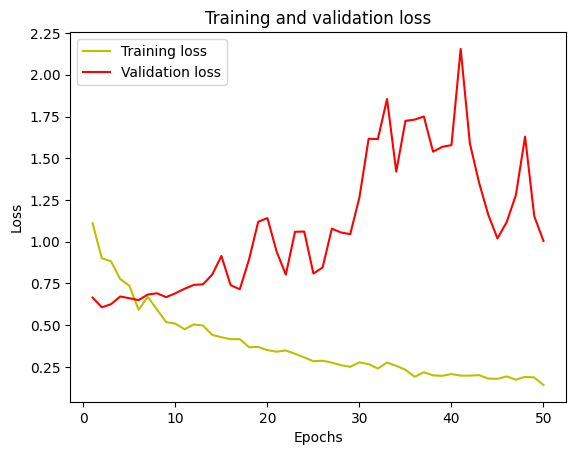

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


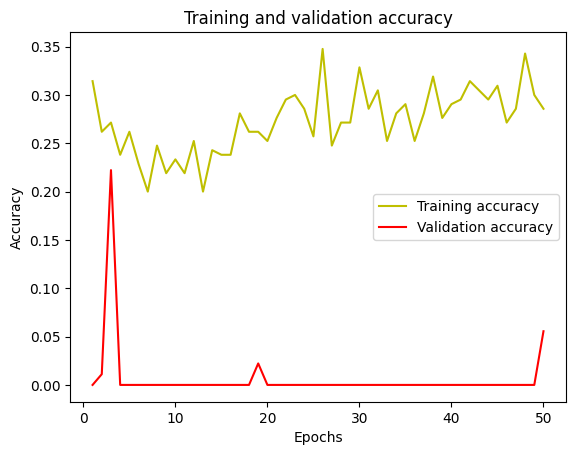

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


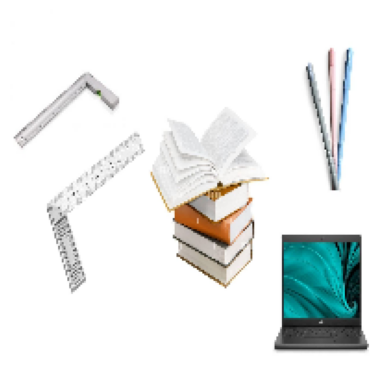

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
laptop : 0.9801
penggaris: 0.8839
buku: 0.5678
pena: 0.0513


In [ ]:
# Contoh file gambar yang ingin diuji
test_image_filename = '33.jpg'  # ganti dengan nama file gambar yang ingin diuji

# Load dan preprocess gambar
img_path = os.path.join(image_directory, test_image_filename)
img = image.load_img(img_path, target_size=(SIZE, SIZE))  # target_size harus (SIZE, SIZE)
img = image.img_to_array(img)
img = img / 255.
plt.imshow(img)
plt.axis('off')
plt.show()

img = np.expand_dims(img, axis=0)

# Ambil nama-nama kelas dari dataframe (kecuali kolom 'id')
classes = np.array(df.columns[1:])  # kolom setelah 'id'

# Prediksi probabilitas setiap kelas
proba = model.predict(img)

# Urutkan indeks kelas berdasarkan probabilitas tertinggi, ambil top 10 (atau sesuai jumlah kelas)
sorted_categories = np.argsort(proba[0])[::-1][:10]

# Tampilkan kelas dengan probabilitas tertinggi
for i in sorted_categories:
    print(f"{classes[i]}: {proba[0][i]:.4f}")


In [ ]:
for i in range(len(classes)):
    kelas = classes[sorted_categories[i]]
    probabilitas = proba[0][sorted_categories[i]]
    print(f"{kelas} ({probabilitas:.3f})")


laptop  (0.980)
penggaris (0.884)
buku (0.568)
pena (0.051)


In [ ]:
###################################################

_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

################################################################

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 504ms/step - accuracy: 0.0590 - loss: 1.0058
Accuracy =  5.55555559694767 %


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert probabilities to class labels (e.g., using a threshold)
y_pred_classes = (y_pred > 0.5).astype(int)  # Threshold 0.5

# Calculate and print the classification report
print(classification_report(y_test, y_pred_classes, target_names=classes))

# Calculate and print the confusion matrix per class
for i in range(len(classes)):
    print(f"Confusion Matrix for {classes[i]}:")
    print(confusion_matrix(y_test[:, i], y_pred_classes[:, i]))


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 828ms/step
              precision    recall  f1-score   support

        pena       0.77      0.32      0.45        72
     laptop        0.83      0.67      0.74        66
        buku       0.83      0.45      0.58        65
   penggaris       0.74      1.00      0.85        67

   micro avg       0.78      0.60      0.68       270
   macro avg       0.79      0.61      0.66       270
weighted avg       0.79      0.60      0.65       270
 samples avg       0.77      0.59      0.65       270

Confusion Matrix for pena:
[[11  7]
 [49 23]]
Confusion Matrix for laptop :
[[15  9]
 [22 44]]
Confusion Matrix for buku:
[[19  6]
 [36 29]]
Confusion Matrix for penggaris:
[[ 0 23]
 [ 0 67]]
